<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P5E10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

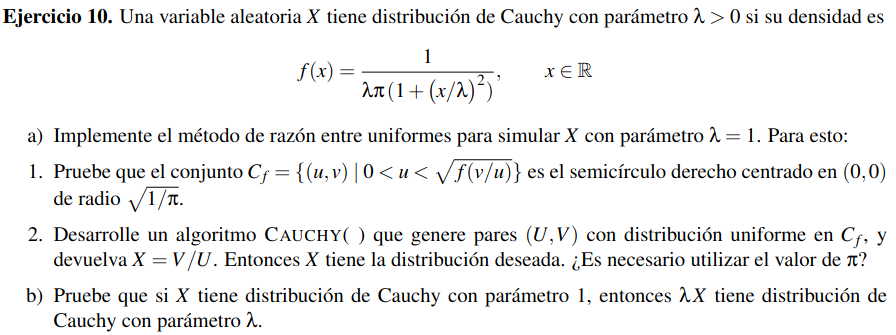

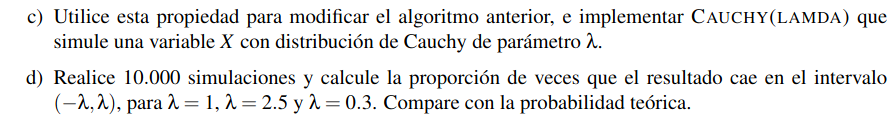

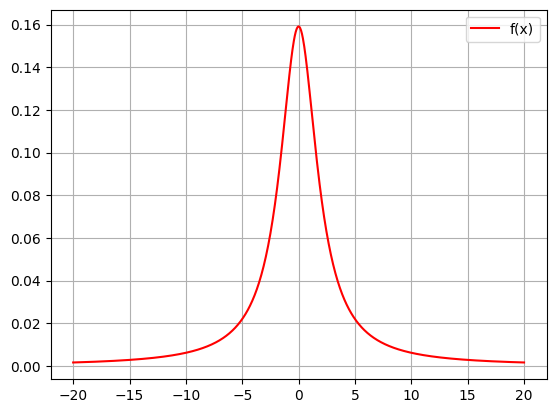

In [18]:
from random import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

NUMERO_DE_MUESTRAS = 100_000
LAMBDA = 2
X_MIN, X_MAX = -20, 20
DOMINIO = np.linspace(X_MIN, X_MAX, 1000)

def f(x, l=LAMBDA):
  return 1 / (l * np.pi * (1 + (x/l)**2))

#@title { vertical-output: true}
sns.lineplot(x=DOMINIO, y=f(DOMINIO), label="f(x)", color="red")
plt.grid(True)
plt.legend()
plt.show()

## 10.a.2

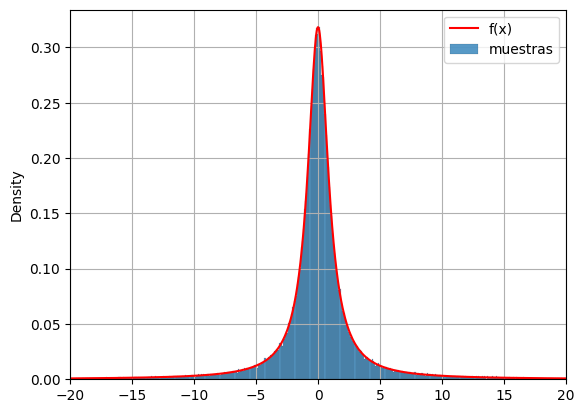

In [19]:
SEMICIRCLE_RADIUS = 1/np.pi**(1/2)  # Radio del semicírculo: √(1/π)
PI_INV = 1 / np.pi                # Inversa de π
SEMICIRCLE_AREA_BOUND = PI_INV   # Cota para el conjunto Cf: u² + v² < 1/π

def cauchy_l1():
  while True:
    u = random() * SEMICIRCLE_RADIUS
    v = (1-random()*2) * SEMICIRCLE_RADIUS
    if u**2 + v**2 < SEMICIRCLE_AREA_BOUND: # u**2 < f(v/u, l=1):
      return v/u

muestras = [
    max(min(cauchy_l1(), X_MAX+1), X_MIN-1)
    for _ in range(NUMERO_DE_MUESTRAS)
]

#@title { vertical-output: true}
sns.lineplot(x=DOMINIO, y=f(DOMINIO, l=1), label="f(x)", color="red")
sns.histplot(muestras, label="muestras", stat="density")
plt.xlim(X_MIN, X_MAX)
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

## 8.c

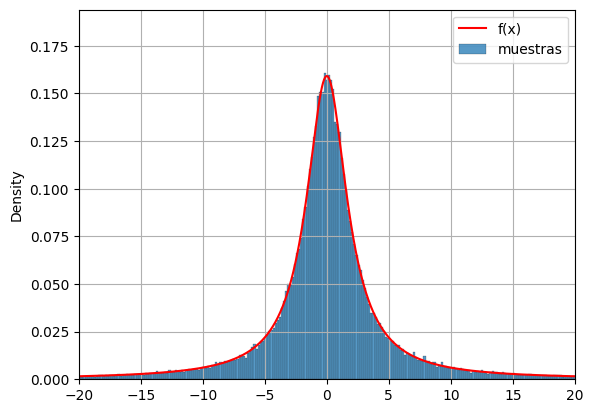

In [20]:
def cauchy(l=LAMBDA):
  return cauchy_l1() * l

muestras = [
    max(min(cauchy(), X_MAX+1), X_MIN-1)
    for _ in range(NUMERO_DE_MUESTRAS)
]

#@title { vertical-output: true}
sns.lineplot(x=DOMINIO, y=f(DOMINIO), label="f(x)", color="red")
sns.histplot(muestras, label="muestras", stat="density")
plt.xlim(X_MIN, X_MAX)
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

## 8.d

In [21]:
P_entreL = sum([
    -LAMBDA < cauchy() < LAMBDA
    for _ in range(NUMERO_DE_MUESTRAS)
]) / NUMERO_DE_MUESTRAS

print("P(-L<=X<=L) = 0.5")
print("Estimacion: ", P_entreL)

P(-L<=X<=L) = 0.5
Estimacion:  0.5015
